In [61]:
import sounddevice as sd
fs = 8000
dur = 2.0
t = np.arange(0.0, dur, 1/fs)
s = 0.8 * np.sin(2 * np.pi * 220.0 * t)
sd.play(s, samplerate=fs, loop=False)

In [1]:
# reproduire 1.5 sec d'un ton pur a 220h avec une f de 8000
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

fs = 8000
dur = 1.5
t = np.arange(0.0, dur, 1/fs)
s_1 = 0.8 * np.sin(2 * np.pi * 220.0 * t)
sd.play(s_1, samplerate=fs, loop=False)



ZeroDivisionError: float division by zero

In [83]:
dur = 1.5
t = np.arange(0.0, dur, 1/fs)
s_2 = 0.8 * np.sin(2 * np.pi * 440.0 * t)
sd.play(s_2, samplerate=fs, loop=False)

sz = np.zeros(400)


In [82]:
meh = np.concatenate((s_1,sz,s_2))
sd.play(meh, samplerate=fs, loop=False)





8000


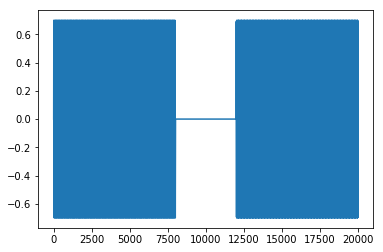

In [104]:
fs_s = 8000
tbase = np.arange(int(fs_s))/fs_s
print(tbase.size)
t = np.arange(int(2.5*fs_s))/fs_s
s = np.zeros(int(2.5*fs))
s[:fs_s] = 0.7 * np.sin(2 * np.pi * 220.0 * tbase)
s[-fs_s:] = 0.7 * np.sin(2 * np.pi * 440.0 * tbase)
plt.plot(s)
sd.play(s, samplerate=fs, loop=False)

In [ ]:
import sounddevice as sd
import matplotlib.pyplot as plt
fs = 48000
dur = 5.0
frames = int(dur * fs)
s = sd.rec(frames, channels=1, samplerate=fs, blocking=True)
plt.plot(np.arange(frames) / fs, s)
plt.show()
sd.play(s)

In [2]:
import sounddevice as sd
duration = 10.5  # seconds

def callback(indata, outdata, frames, time, status):
    if status:
        print(status)
    outdata[:] = indata

with sd.Stream(channels=2, callback=callback):
    sd.sleep(int(duration * 1000))

In [39]:
# reproduire 1.5 sec d'un ton pur a 220h avec une f de 8000
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

fs = 22050

dur = 1.5
# echantillonage
t = np.arange(0.0, dur, 1/fs)

amplitude = 0.5
f800 = amplitude * np.sin(2 * np.pi * 800.0 * t)
f1600 = amplitude * np.sin(2 * np.pi * 1600.0 * t)
f3200 = amplitude * np.sin(2 * np.pi * 3200.0 * t)
f6400 = amplitude * np.sin(2 * np.pi * 6400.0 * t)
f12800 = amplitude * np.sin(2 * np.pi * 12800.0 * t)
f22050 = amplitude * np.sin(2 * np.pi * 22450.0 * t)
f25600 = amplitude * np.sin(2 * np.pi * 25600.0 * t)
f32000 = amplitude * np.sin(2 * np.pi * 32000.0 * t)
f480000 = amplitude * np.sin(2 * np.pi * 480090.0 * t)


sound = np.concatenate((f800,f1600,f3200,f6400,f12800, f22050,f25600,f32000,f48000))



#sd.play(f22050, samplerate=fs, loop=False)
sd.play(f22050, samplerate=fs, loop=False)



In [40]:
# freq 480000
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

fs = 22050

dur = 1.5
# echantillonage
t = np.arange(0.0, dur, 1/fs)

tons = []
amplitude = 0.8
for f in[800.0, 1600.0, 3200.0, 6400.0, 12800.0, 22050.0, 25600.0,  32000.0, 480000.0]:
    s = amplitude * np.sin(2 * np.pi * f * t)
    tons.append(s)

son = np.concatenate(tons);


#sd.play(f22050, samplerate=fs, loop=False)
sd.play(son, samplerate=fs, loop=False)



In [ ]:
f22050 = amplitude * np.sin(2 * np.pi * 22450.0 * t)
sd.play(f22050, samplerate=fs, loop=False)
# On entend un son grave



In [44]:
# freq 480000
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

fs = 22050

dur = 1.5
# echantillonage
t = np.arange(0.0, dur, 1/fs)

tons = []
amplitude = 0.8
for f in[800.0, 1600.0, 3200.0, 6400.0, 12800.0, 22050.0, 25600.0,  32000.0, 480000.0]:
    s = amplitude * np.sin(2 * np.pi * f * t)
    tons.append(s)
    
    
    
amps = []

for a in [0.75,1.0,1.5,3.0,6.0,12.0,24.0,48.0, 96.0]:
    s = a * np.sin(2 * np.pi * 400.0 * t)
    amps.append(s)
    
son = np.concatenate(amps);


sd.play(son, samplerate=fs, loop=False)



In [72]:
# freq 480000
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

fs = 22050

dur = 1.5
# echantillonage
t = np.arange(0.0, dur, 1/fs)

tons = []

s = 0.8 * np.sin(2 * np.pi * 400.0 * t + np.pi/2) ## Change de phase initiale, on entend le click ( discontinuité)
s2 = 0.8 * np.sin(2 * np.pi/3 * 400.0 * t)
s2 = 0.8 * np.sin(2 * np.pi/5 * 400.0 * t)
meh = np.zeros(200)

son = np.concatenate((meh, s));


sd.play(son, samplerate=fs, loop=False)



## TD 5
### question 2

In [360]:
# freq 480000
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal



def seq_hz(freqs, dur=0.5, sil_dur=0.02, fs=44100, amp=0.02):
    temps = []
    t = np.arange(int(dur*fs))/fs
    for i in freqs:
        s = (amp * np.sin(2 * np.pi * i * t))
        w = signal.hann(s.shape[0])
        temps.append(w*s)
        temps.append(np.zeros(int(fs*sil_dur))) # 1s = fs
    return np.concatenate(temps)
    
freqs = np.linspace(10,200000,300);
res = seq_hz(freqs, dur=0.5, sil_dur=0, fs=44000)

sd.play(res)


In [286]:
def hz_to_midi(hz):
    return 12*np.log2(hz/440)+69

def midi_to_hz(midi):
    return 440*2**((midi-69)/12)


In [357]:
def seq_midi(midis, dur=0.02, sil_dur=0.02, fs=44100, amp=0.5):
    freqs = midi_to_hz(midis)
    #print(freqs)
    return seq_hz(freqs, dur=0.5, sil_dur=0, fs=44000)

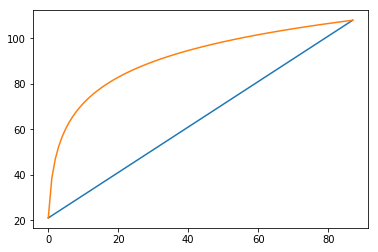

In [278]:
## question 3

fs = 44100

midi_lin = np.arange(21,109)
freqs_lin = np.linspace(27.5,4186.00904481, 109-21) 
res = seq_midi(midi_lin, dur=0.02, sil_dur=0.002, fs=fs)
s = seq_hz(freqs_lin, dur=0.02, sil_dur=0.002, fs=fs)

#sd.play(res, samplerate=fs)

plt.plot(midi_lin)
plt.plot(hz_to_midi(freqs_lin))
sd.play(s, samplerate=fs)




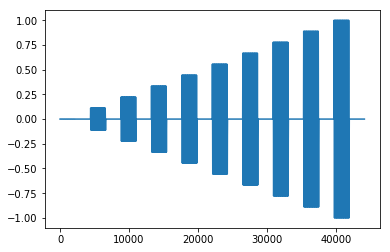

In [322]:
amps = np.linspace(0.001, 1.0, 10)
def seq_amp(amps, freq=440, dur=0.05, sil_dur=0.05, fs=44100):
    temp = []
    t = np.arange(int(dur*fs))/fs
    for a in amps:
        temp.append(a * np.sin(2 * np.pi * freq * t))
        temp.append(np.zeros(int(fs*sil_dur))) # 1s = fs

    return np.concatenate(temp)

m = seq_amp(amps)
plt.plot(m)

sd.play(m)

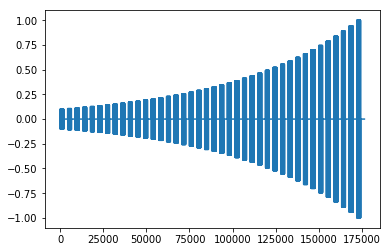

In [325]:
def amp_to_db(amp):
    return 20*np.log10(amp)

def db_to_amp(dbs):
    return 10**(dbs/20)

def seq_dbs(dbs, freq=440, dur=0.05, sil_dur=0.05, fs=44100):
    amps = db_to_amp(dbs)
    return seq_amp(amps)

s = seq_dbs(np.linspace(-20,0, 40), dur=0.1, sil_dur=0.2, fs=fs)

sd.play(s, samplerate=fs)
plt.plot(s)


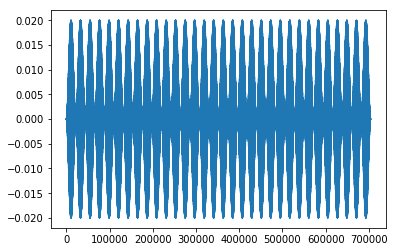

In [367]:
notes = [60, 62, 64, 60, 60, 62, 64, 60, 64, 65,67, 64, 65, 67, 67, 69, 67, 65, 64, 60, 67, 69, 67, 65, 64, 60, 60, 55, 60, 60, 55,60]
fs = 44000
rand = np.random.randint(30,80,100)

s = seq_midi(np.array(notes), fs=fs)
w = signal.hann(s.shape[0])

sd.play(w*s, samplerate=fs)
plt.plot(s)

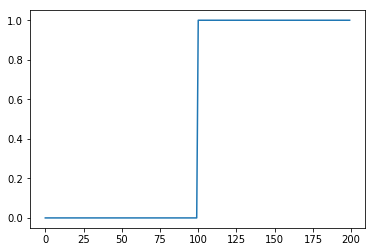

In [10]:
## TD 7
zeros = np.zeros(100)
ones = np.ones(100)
a = np.concatenate((zeros, ones))
plt.plot(a)
plt.show()
#sd.play(a, samplerate=44000)






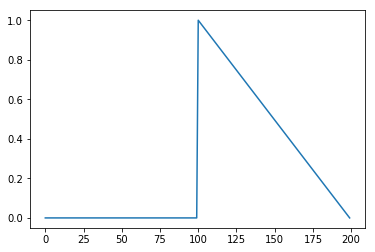

In [11]:
b = np.concatenate((zeros, np.linspace(1.0,0.0, num=100)))
plt.plot(b)
sd.play(b, samplerate=8000)

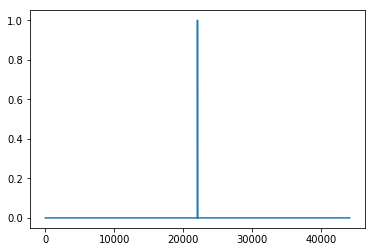

In [12]:

c = np.zeros(44100)
c[-c.shape[0]/2] = 1
plt.show()
plt.plot(c)
sd.play(c, samplerate=8000)

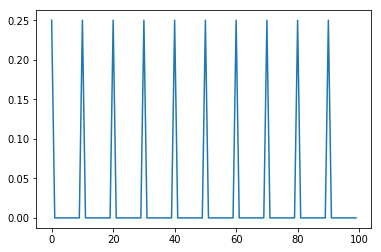

In [445]:
n = np.zeros(100)
n[::10] = 0.25
plt.plot(n)

sd.play(n, samplerate=8000)

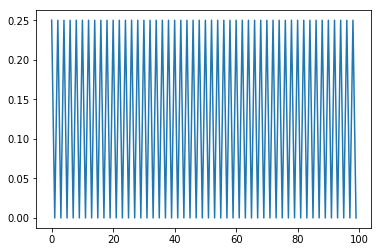

In [450]:
n = np.zeros(100)
n[::2] = 0.25
plt.plot(n)

sd.play(n, samplerate=8000)


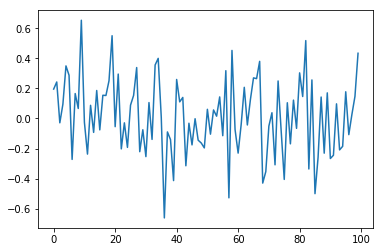

In [454]:
s = np.random.normal(0, 0.25, 100)
sd.play(s, samplerate=8000)
plt.plot(s)

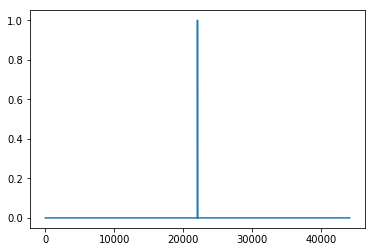

In [7]:
dur = 1
fs = 44100
s = np.zeros(int(fs*dur))
s[-s.shape[0]/2] = 1
plt.show()
plt.plot(s)
sd.play(s, samplerate=8000)

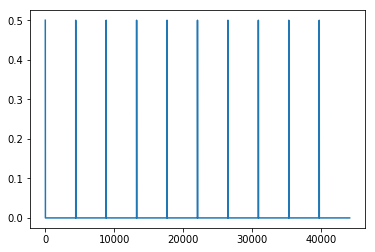

In [20]:
dur = 1
fs = 44100
s = np.zeros(int(fs*dur))
s[::int(0.1*fs)] = 0.5
plt.show()
plt.plot(s)
sd.play(s, samplerate=8000)

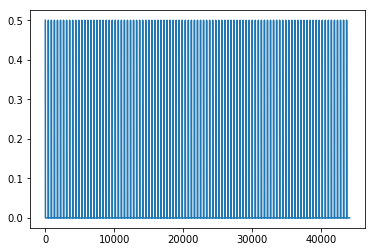

In [27]:
dur = 1
fs = 44100
s = np.zeros(int(fs*dur))
s[::int(0.01*fs)] = 0.5
plt.show()
plt.plot(s)
sd.play(s, samplerate=8000)

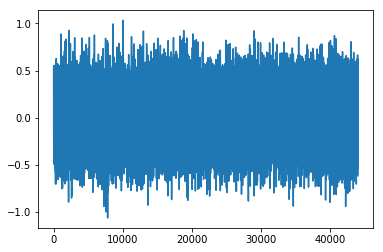

In [40]:
dur = 1
fs = 44100
s = np.random.normal(0.0, 0.25, fs)
plt.show()
plt.plot(s)
sd.play(s, samplerate=8000)

$$ sin(2\pi*ft+\Phi_0)$$

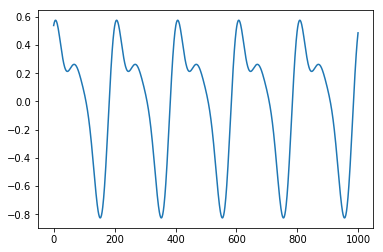

In [92]:

fs = 44100.0
dur = 1.0
t = np.arange(int(dur*fs))/fs
s = np.zeros(int(dur*fs))
f = [220.0,440.0,660.0]
a = [0.5,0.3,0.1]
phi0 = [0.3,1.5,2.0]
for freq,amp,phase in zip(f,a,phi0):
    s += amp * np.sin(2 * np.pi * freq * t + phase)
plt.plot(s[:1000])
plt.show()

sd.play(s*0.5, samplerate=8000)

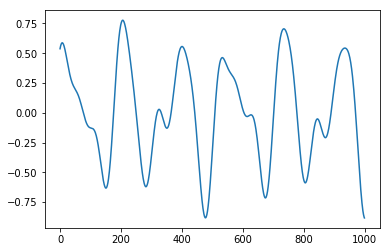

In [90]:
fs = 44100.0
dur = 1.0
t = np.arange(int(dur*fs))/fs
s = np.zeros(int(dur*fs))
f = [250.0,420.0,680.0]
a = [0.5,0.3,0.1]
phi0 = [0.3,1.5,2.0]
for freq,amp,phase in zip(f,a,phi0):
    s += amp * np.sin(2 * np.pi * freq * t + phase)
plt.plot(s[:1000])
plt.show()

sd.play(s*1, samplerate=8000)

In [195]:
dur = 1
fs = 44100
x = sd.rec(int(dur*fs),samplerate=fs,channels=1)

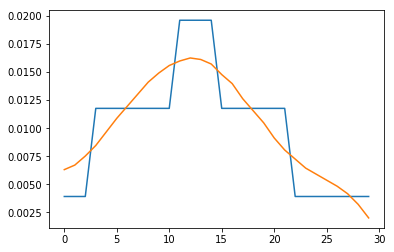

In [161]:
x/= np.abs(x).max()
x_q = (x + 1 )/2
x_q = x_q*255 
x_q = np.round(x_q)
x_q = x_q/255
x_q = x_q*2-1
plt.plot(x_q[-3000:-2970])
plt.plot(x[-3000:-2970])
plt.show()
sd.play(x_q, samplerate=fs)

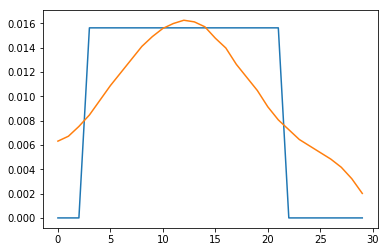

In [164]:
x/= np.abs(x).max()
x_q = (x + 1 )/2
x_q = x_q*128 
x_q = np.round(x_q)
x_q = x_q/128
x_q = x_q*2-1
plt.plot(x_q[-3000:-2970])
plt.plot(x[-3000:-2970])
plt.show()
sd.play(x_q, samplerate=fs)

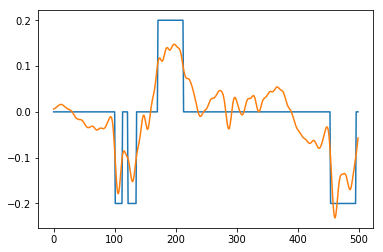

In [177]:
x/= np.abs(x).max()
x_q = (x + 1 )/2
x_q = x_q*10
x_q = np.round(x_q)
x_q = x_q/10
x_q = x_q*2-1
plt.plot(x_q[-3000:-2500])
plt.plot(x[-3000:-2500])
plt.show()
sd.play(x_q, samplerate=fs)

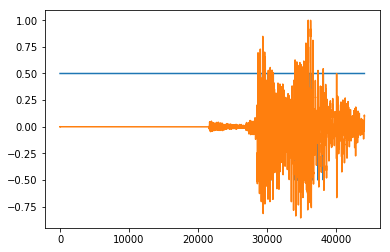

In [200]:

x_c = np.clip(x,0.5,-0.5)
plt.plot(x_c)
plt.plot(x)
plt.show()
sd.play(x, samplerate=fs)

In [196]:

x/= np.abs(x).max()

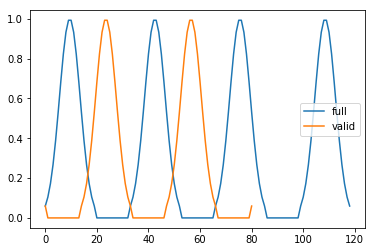

In [214]:
import scipy.signal as sig
u = np.zeros(100)
u[::33] = 1

h = sig.gaussian(20,std=4)
a = np.convolve(u,h,'full')
a_same = np.convolve(u,h,'valid')
plt.plot(a)
plt.plot(a_same)
plt.legend({'full','valid'})
plt.show()

<IPython.core.display.Javascript object>


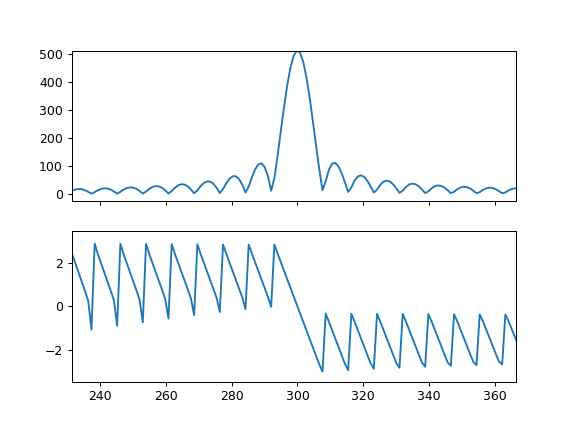

In [229]:
%matplotlib notebook
N = 1024.0; fs = 8000.0; freq = 300.0; Nfft = N
x = np.cos(2*np.pi*freq*np.arange(N)/fs)
Nfft = 8192.0
y = np.zeros(8192)
y[:int(N)] = x
X = np.fft.fft(y)
freqs = np.arange(X.size) / Nfft * fs
fig, axs = plt.subplots(nrows=2, sharex=True)
axs[0].plot(freqs, np.abs(X))
axs[1].plot(freqs, np.angle(X))
plt.show()

In [16]:
class StateVariableFilter(object):
    def __init__(self, samplerate):
        self.samplerate = samplerate
        self.yh = 0;
        self.yb = 0;
        self.yl = 0;
    def process(self, x, fc, damp):
        F1 = 2*np.sin(np.pi*fc/self.samplerate)
        Q1 = 2*damp
        self.yh = x - self.yl - Q1*self.yb
        self.yb = F1*self.yh + self.yb
        self.yl = F1*self.yb + self.yl
        return self.yh, self.yb, self.yl

100%|██████████| 396900/396900 [00:05<00:00, 78609.63it/s] 


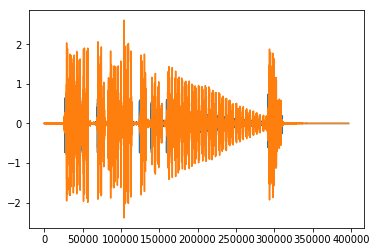

In [96]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import tqdm as tqdm
fs, x = wav.read('guitar_lick_flt.wav')
fc = (np.sin(2*np.pi*10.0*np.arange(x.size)/fs)+1)/2*(4980)+20
y = np.empty_like(x)
swf = StateVariableFilter(samplerate=fs)
for n in tqdm.tqdm(range(x.size)):
    yh_n, yb_n, yl_n = swf.process(x[n], fc[n], 0.05)
    y[n] = yb_n
sd.play(y, samplerate=fs)

plt.plot(x)
plt.plot(y)
plt.show()

In [21]:
class EnvelopeFollower(object):
    def __init__(self, samplerate, attack, release):
        self.samplerate = samplerate
        self.y = 0.0
        self.attack = attack
        self.release = release

        
    def process(self, x):
        Ts = 1.0/self.samplerate
        a = np.exp(-(Ts/self.attack))
        b = np.exp(-(Ts/self.release))
        if (self.y<abs(x)):
            self.y=((1-a)*abs(x)) + (a*self.y)
        else:
            self.y=((1-b)*abs(x)) + (b*self.y)
        return self.y
    

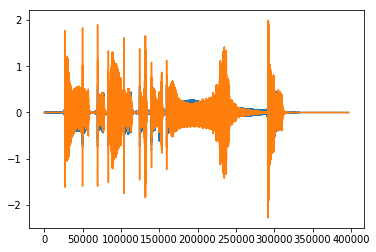

In [30]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
fs, x = wav.read('guitar_lick_flt.wav')
#fc = (np.sin(2*np.pi*10.0*np.arange(x.size)/fs)+1)/2*(4980)+20
y = np.empty_like(x)
swf = StateVariableFilter(samplerate=fs)
env = EnvelopeFollower(fs, 0.002, 0.01)
for n in range(x.size):
    y_n  = env.process(x[n])
    fc_n = 20 +(5000.0-20.0) * y_n 
    yh_n, yb_n, yl_n = swf.process(x[n], fc_n, 0.05)
    y[n] = yb_n
sd.play(y, samplerate=fs)
plt.figure()
plt.plot(x)
plt.plot(y)
plt.show()

In [62]:
class DelayLine(object):
    def __init__(self, samplerate, max_delay):
        self.samplerate = samplerate
        self.max_delay = max_delay
        self.z = np.zeros(int(max_delay*samplerate))
        self.ind = 0
    def write(self, x):
        self.z[self.ind] = x
        self.ind = (self.ind+1) % self.z.size
    def read(self, delay):
        assert delay < self.max_delay
        
        m = int(delay*self.samplerate)
        return self.z[self.ind - m]
        

100%|██████████| 396900/396900 [00:02<00:00, 191000.96it/s]


<IPython.core.display.Javascript object>


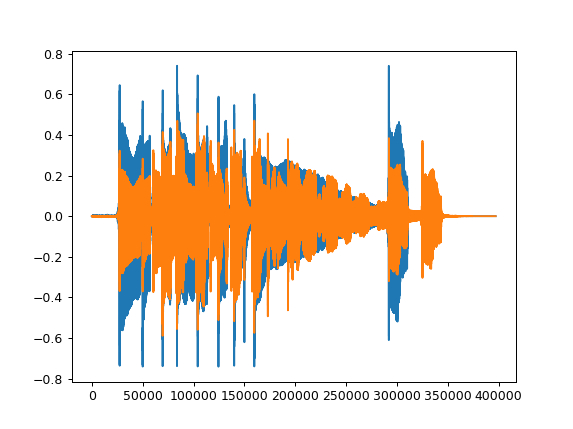

In [71]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import tqdm as tqdm
%matplotlib notebook
fs, x = wav.read('guitar_lick_flt.wav')

y = np.empty_like(x)
delay = DelayLine(fs, 1.0)
for n in tqdm.tqdm(range(x.size)):
    delay.write(x[n])
    y[n] = 0.5*x[n] + 0.5 * delay.read(0.75)
sd.play(y, samplerate=fs)
plt.figure()
plt.plot(x)
plt.plot(y)
plt.show()